In [1]:
import cptac
import numpy as np
import pandas as pd
from gprofiler import GProfiler
import seaborn as sns
import matplotlib.pyplot as plt

cptac warning: Your version of cptac (0.8.8) is out-of-date. Latest is 0.9.0. Please run 'pip install --upgrade cptac' to update it. (<ipython-input-1-1cd1c7874502>, line 1)


In [2]:
permutation_df = pd.read_csv('data/full_10k_permutation_corrected.csv')
correlation_df = pd.read_csv('data/corr_diff.csv')
regression_df = pd.read_csv('data/regressions_data.csv')

In [3]:
permutation_df = pd.melt(permutation_df, id_vars='Cancer', var_name = 'Gene', value_name = 'perm_pval')

In [4]:
correlation_df = correlation_df.melt(id_vars='Cancer', var_name='Gene', value_name='delta_corr') 

In [5]:
regression_df = regression_df.rename(columns={'gene': 'Gene', 'cancer': 'Cancer'})
regression_df = regression_df[['Cancer', 'Gene', 'interaction_coeff', 'interaction_pval']]

In [6]:
df = pd.merge(permutation_df, correlation_df, how = 'outer')
df = pd.merge(df, regression_df, how = 'outer')

In [7]:
background_genes = list(pd.unique(df.Gene))
len(background_genes)

13669

In [8]:
rows = []
for gene in pd.unique(df.Gene):
    row = {}
    gene_df = df[df.Gene == gene]
    gene_df = gene_df[gene_df.perm_pval <= 0.05]
    if len(gene_df) > 2:
        row['Gene'] = gene
        row['perm_pval'] = np.mean(gene_df.perm_pval)
        row['delta_corr'] = np.mean(gene_df.delta_corr)
        row['interaction_coeff'] = np.mean(gene_df.interaction_coeff)
        row['interaction_pval'] = np.mean(gene_df.interaction_pval)
        row['abs_interaction_coeff'] = abs(np.mean(gene_df.interaction_coeff))
        rows.append(row)
sig_perm_df = pd.DataFrame(rows)
sig_perm_df

,Gene,perm_pval,delta_corr,interaction_coeff,interaction_pval,abs_interaction_coeff
0,AAAS,0.029511,0.383641,0.478558,0.310070,0.478558
1,AAGAB,0.000010,0.513239,0.744205,0.099849,0.744205
2,AAK1,0.000017,0.539893,0.468512,0.058654,0.468512
3,AAMP,0.007805,0.422332,0.834418,0.051275,0.834418
4,AARS,0.007671,0.443220,0.588859,0.273249,0.588859
...,...,...,...,...,...,...
3803,ZSCAN18,0.009996,0.461501,0.204678,0.498252,0.204678
3804,ZW10,0.001301,0.481355,0.596254,0.095312,0.596254
3805,ZWILCH,0.000030,0.775549,1.843545,0.101584,1.843545
3806,ZWINT,0.001874,0.854401,0.988399,0.001941,0.988399


In [9]:
rows = []
for gene in pd.unique(df.Gene):
    row = {}
    gene_df = df[df.Gene == gene]
    gene_df = gene_df[gene_df.interaction_pval <= 0.05]
    if len(gene_df) > 2:
        row['Gene'] = gene
        row['perm_pval'] = np.mean(gene_df.perm_pval)
        row['delta_corr'] = np.mean(gene_df.delta_corr)
        row['interaction_coeff'] = np.mean(gene_df.interaction_coeff)
        row['interaction_pval'] = np.mean(gene_df.interaction_pval)
        row['abs_interaction_coeff'] = abs(np.mean(gene_df.interaction_coeff))
        rows.append(row)
sig_regression_df = pd.DataFrame(rows)
sig_regression_df

,Gene,perm_pval,delta_corr,interaction_coeff,interaction_pval,abs_interaction_coeff
0,AAK1,2.187208e-09,0.539893,0.453549,0.005085,0.453549
1,AARS2,1.575518e-01,0.399337,0.719068,0.015352,0.719068
2,AASDHPPT,4.554894e-09,0.569367,0.850032,0.001351,0.850032
3,AASS,9.059842e-08,0.516246,1.079797,0.015262,1.079797
4,ABCB10,2.677682e-02,0.345190,1.149501,0.013915,1.149501
...,...,...,...,...,...,...
1364,ZNF638,2.620840e-04,0.647382,1.012607,0.002426,1.012607
1365,ZNF687,5.961230e-04,0.622238,0.797145,0.014088,0.797145
1366,ZNFX1,6.527134e-02,0.420009,0.388419,0.005495,0.388419
1367,ZNHIT2,5.211000e-05,0.664401,0.756881,0.000306,0.756881


In [10]:
gp = GProfiler(return_dataframe=True)

In [11]:
sig_perm_unranked = pd.unique(sig_perm_df.Gene)
sig_perm_df = sig_perm_df.sort_values(by = 'abs_interaction_coeff', ascending = False)
sig_perm_slope = pd.unique(sig_perm_df.Gene)
sig_perm_upregulated = sig_perm_df[sig_perm_df.interaction_coeff >= 0]
sig_perm_upregulated_unranked = pd.unique(sig_perm_upregulated.Gene)
sig_perm_upregulated = sig_perm_upregulated.sort_values(by = 'interaction_coeff', ascending = False)
sig_perm_upregulated = pd.unique(sig_perm_upregulated.Gene)
sig_perm_downregulated = sig_perm_df[sig_perm_df.interaction_coeff <= 0]
sig_perm_downregulated_unranked = pd.unique(sig_perm_downregulated.Gene)
sig_perm_downregulated = sig_perm_downregulated.sort_values(by = 'interaction_coeff')
sig_perm_downregulated = pd.unique(sig_perm_downregulated.Gene)

In [12]:
sig_perm_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [13]:
sig_perm_slope = gp.profile(organism='hsapiens', query = list(sig_perm_slope), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [14]:
sig_perm_upregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_upregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [15]:
sig_perm_upregulated = gp.profile(organism='hsapiens', query = list(sig_perm_upregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [16]:
sig_perm_downregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_downregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [17]:
sig_perm_downregulated = gp.profile(organism='hsapiens', query = list(sig_perm_downregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [18]:
sig_regression_unranked = pd.unique(sig_regression_df.Gene)
sig_regression_df = sig_regression_df.sort_values(by = 'abs_interaction_coeff', ascending = False)
sig_regression_slope = pd.unique(sig_regression_df.Gene)
sig_regression_upregulated = sig_regression_df[sig_regression_df.interaction_coeff >= 0]
sig_regression_upregulated_unranked = pd.unique(sig_regression_upregulated.Gene)
sig_regression_upregulated = sig_regression_upregulated.sort_values(by = 'interaction_coeff', ascending = False)
sig_regression_upregulated = pd.unique(sig_regression_upregulated.Gene)
sig_regression_downregulated = sig_regression_df[sig_regression_df.interaction_coeff <= 0]
sig_regression_downregulated_unranked = pd.unique(sig_regression_downregulated.Gene)
sig_regression_downregulated = sig_regression_downregulated.sort_values(by = 'interaction_coeff')
sig_regression_downregulated = pd.unique(sig_regression_downregulated.Gene)

In [19]:
sig_regression_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [20]:
sig_regression_slope = gp.profile(organism='hsapiens', query = list(sig_regression_slope), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [21]:
sig_regression_upregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_upregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [22]:
sig_regression_upregulated = gp.profile(organism='hsapiens', query = list(sig_regression_upregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [23]:
sig_regression_downregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_downregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [24]:
sig_regression_downregulated = gp.profile(organism='hsapiens', query = list(sig_regression_downregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [25]:
sig_perm_unranked['Analysis'] = ['perm_unranked'] * len(sig_perm_unranked)
sig_perm_slope['Analysis'] = ['perm_slope'] * len(sig_perm_slope)
sig_perm_upregulated_unranked['Analysis'] = ['perm_upregulated_unranked'] * len(sig_perm_upregulated_unranked)
sig_perm_upregulated['Analysis'] = ['perm_upregulated'] * len(sig_perm_upregulated)
sig_perm_downregulated_unranked['Analysis'] = ['perm_downregulated_unranked'] * len(sig_perm_downregulated_unranked)
sig_perm_downregulated['Analysis'] = ['perm_downregulated'] * len(sig_perm_downregulated)

In [26]:
sig_regression_unranked['Analysis'] = ['regression_unranked'] * len(sig_regression_unranked)
sig_regression_slope['Analysis'] = ['regression_slope'] * len(sig_regression_slope)
sig_regression_upregulated_unranked['Analysis'] = ['regression_upregulated_unranked'] * len(sig_regression_upregulated_unranked)
sig_regression_upregulated['Analysis'] = ['regression_upregulated'] * len(sig_regression_upregulated)
sig_regression_downregulated_unranked['Analysis'] = ['regression_downregulated_unranked'] * len(sig_regression_downregulated_unranked)
sig_regression_downregulated['Analysis'] = ['regression_downregulated'] * len(sig_regression_downregulated)

In [27]:
upregulated_pathways = [sig_perm_unranked, sig_perm_slope,sig_perm_upregulated_unranked,sig_perm_upregulated,sig_regression_unranked,sig_regression_slope,
                       sig_regression_upregulated_unranked,sig_regression_upregulated]

In [28]:
upregulated_pathways_df = pd.concat(upregulated_pathways)
upregulated_pathways_df = upregulated_pathways_df[upregulated_pathways_df.term_size < 500]
upregulated_pathways_df = upregulated_pathways_df[upregulated_pathways_df.term_size > 15]
upregulated_pathways_df

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences,Analysis
3,GO:BP,GO:0044282,small molecule catabolic process,1.490449e-10,True,"""The chemical reactions and pathways resulting...",337,3746,160,13575,0.042712,0.474777,query_1,"[GO:0009056, GO:0044281]","[AASS, ABAT, ABCD3, ACAA2, ACAD10, ACAD8, ACAD...","[[TAS, NAS], [IBA], [IGI, IBA], [IBA, TAS], [T...",perm_unranked
7,GO:BP,GO:0055086,nucleobase-containing small molecule metabolic...,1.147324e-09,True,"""The cellular chemical reactions and pathways ...",461,3746,202,13575,0.053924,0.438178,query_1,"[GO:0006139, GO:0044281]","[AAAS, ACACA, ACAT1, ACBD6, ACLY, ACOT11, ACOT...","[[TAS], [ISS, TAS], [IDA], [TAS], [IDA, IBA, T...",perm_unranked
17,GO:BP,GO:0034340,response to type I interferon,4.749559e-06,True,"""Any process that results in a change in state...",76,3746,48,13575,0.012814,0.631579,query_1,"[GO:0034097, GO:0045087]","[ABCE1, ADAR, BST2, CACTIN, CDC37, CNOT7, FADD...","[[TAS], [TAS], [TAS], [IMP], [IMP], [IMP], [IM...",perm_unranked
18,GO:BP,GO:0071357,cellular response to type I interferon,6.590742e-06,True,"""Any process that results in a change in state...",72,3746,46,13575,0.012280,0.638889,query_1,"[GO:0034340, GO:0071345]","[ABCE1, ADAR, BST2, CACTIN, CDC37, CNOT7, FADD...","[[TAS], [TAS], [TAS], [IMP], [IMP], [IMP], [IM...",perm_unranked
19,GO:BP,GO:0060337,type I interferon signaling pathway,6.590742e-06,True,"""A series of molecular signals initiated by th...",72,3746,46,13575,0.012280,0.638889,query_1,"[GO:0019221, GO:0071357]","[ABCE1, ADAR, BST2, CACTIN, CDC37, CNOT7, FADD...","[[TAS], [TAS], [TAS], [IMP], [IMP], [IMP], [IM...",perm_unranked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,GO:BP,GO:0051225,spindle assembly,6.896506e-03,True,"""The aggregation, arrangement and bonding toge...",97,224,12,13575,0.053571,0.123711,query_1,"[GO:0007051, GO:0070925]","[SPAG5, PLK1, BCCIP, RACGAP1, KIFC1, TPX2, MAP...","[[IMP], [IDA], [IMP], [IDA], [IMP, IBA], [IDA,...",regression_upregulated
16,GO:BP,GO:0007052,mitotic spindle organization,1.618737e-02,True,"""A process that is carried out at the cellular...",108,308,14,13575,0.045455,0.129630,query_1,"[GO:0007051, GO:1902850]","[PLK1, BCCIP, RACGAP1, KIFC1, CCNB1, TPX2, PRC...","[[IDA], [IMP], [IDA], [IMP, IBA], [IMP], [IDA,...",regression_upregulated
17,GO:BP,GO:0009451,RNA modification,1.825347e-02,True,"""The covalent alteration of one or more nucleo...",131,695,24,13575,0.034532,0.183206,query_1,"[GO:0016070, GO:0043412]","[TFB2M, TFB1M, TRMT5, NSUN2, TRIT1, MRM1, TRMT...","[[IBA], [IBA, TAS], [IMP, IBA], [IDA, IBA, TAS...",regression_upregulated
18,GO:BP,GO:1902850,microtubule cytoskeleton organization involved...,2.257544e-02,True,"""Any microtubule cytoskeleton organization tha...",127,308,15,13575,0.048701,0.118110,query_1,"[GO:0000226, GO:1903047]","[PLK1, BCCIP, RACGAP1, KIFC1, CCNB1, TPX2, PRC...","[[IDA], [IMP], [IDA], [IMP, IBA], [IMP], [IDA,...",regression_upregulated


In [29]:
upregulated_pathways_df['p_value'] = -np.log10(upregulated_pathways_df['p_value'])

Text(0.5, 0, '-log10 p-value')

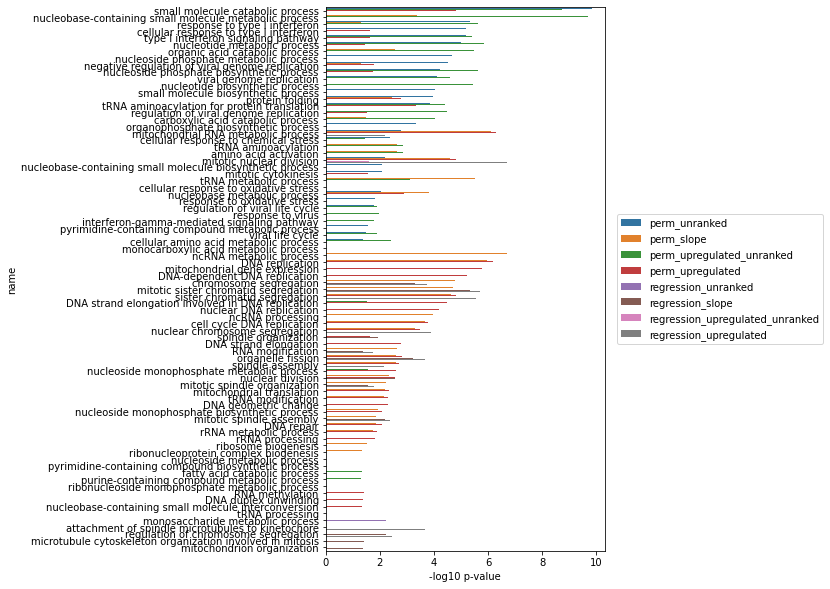

In [30]:
plt.figure(figsize=(5,10))
g = sns.barplot(data = upregulated_pathways_df,
               x = 'p_value', y = 'name', hue = 'Analysis')
g.legend(loc='center right', bbox_to_anchor=(1.8, .5))
plt.xlabel('-log10 p-value')

In [31]:
num_upregulated_analyses = len(pd.unique(upregulated_pathways_df.Analysis))

In [32]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-32-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [33]:
upregulated_pathways = []
upregulated_analyses = []
for pathway in pd.unique(upregulated_pathways_df.name):
    pathway_df = upregulated_pathways_df[upregulated_pathways_df.name == pathway]
    analyses = set(pathway_df.Analysis)
    if analyses not in upregulated_analyses:
        upregulated_analyses.append(analyses)
        upregulated_pathways.append({pathway})
    else:
        i = upregulated_analyses.index(analyses)
        upregulated_pathways[i].add(pathway)
upregulated_pathways_df = pd.DataFrame({'Analyses':upregulated_analyses, 'Pathways': upregulated_pathways})
upregulated_pathways_df['Pathway_Frequency'] = [len(a) / num_upregulated_analyses for a in upregulated_pathways_df.Analyses]
upregulated_pathways_df = upregulated_pathways_df.sort_values(by = 'Pathway_Frequency', ascending = False)
upregulated_pathways_df

,Analyses,Pathways,Pathway_Frequency
5,"{perm_upregulated_unranked, perm_slope, perm_upregulated, regression_slope, regression_upregulated, regression_upregulated_unranked, perm_unranked}",{mitotic nuclear division},0.875
4,"{perm_upregulated_unranked, perm_slope, perm_upregulated, regression_slope, regression_upregulated, perm_unranked}",{mitochondrial RNA metabolic process},0.750
0,"{perm_upregulated_unranked, perm_slope, perm_upregulated, regression_unranked, perm_unranked}",{small molecule catabolic process},0.625
11,"{perm_upregulated_unranked, perm_slope, perm_upregulated, regression_slope, regression_upregulated}","{organelle fission, sister chromatid segregation}",0.625
10,"{perm_slope, perm_upregulated, regression_slope, regression_upregulated, regression_upregulated_unranked}",{mitotic sister chromatid segregation},0.625
1,"{perm_unranked, perm_upregulated_unranked, perm_slope, perm_upregulated}","{organic acid catabolic process, tRNA aminoacylation for protein translation, negative regulation of viral genome replication, amino acid activation, response to type I interferon, nucleobase-containing small molecule metabolic process, nucleobase metabolic process, protein folding, tRNA aminoacylation, tRNA metabolic process, carboxylic acid catabolic process}",0.500
9,"{perm_upregulated, regression_slope, perm_slope, regression_upregulated}","{spindle assembly, chromosome segregation, mitotic spindle assembly, RNA modification, nuclear division, nuclear chromosome segregation, spindle organization}",0.500
6,"{perm_unranked, regression_upregulated, perm_slope, perm_upregulated}",{mitotic cytokinesis},0.500
2,"{perm_unranked, perm_upregulated_unranked, perm_upregulated}","{regulation of viral genome replication, cellular response to type I interferon, type I interferon signaling pathway, nucleotide biosynthetic process, nucleoside phosphate biosynthetic process, nucleotide metabolic process}",0.375
12,"{perm_upregulated, perm_upregulated_unranked, perm_slope}","{DNA strand elongation involved in DNA replication, nucleoside monophosphate metabolic process}",0.375


In [34]:
rows = []
for index, row in upregulated_pathways_df.iterrows():
    pathways = row.Pathways
    for pathway in pathways:
        new_row = dict()
        new_row['Pathway'] = pathway
        new_row['Frequency'] = row.Pathway_Frequency
        rows.append(new_row)
upregulated_pathways_df = pd.DataFrame(rows)
upregulated_pathways_df

,Pathway,Frequency
0,mitotic nuclear division,0.875
1,mitochondrial RNA metabolic process,0.750
2,small molecule catabolic process,0.625
3,organelle fission,0.625
4,sister chromatid segregation,0.625
...,...,...
75,ribonucleoside monophosphate metabolic process,0.125
76,RNA methylation,0.125
77,tRNA processing,0.125
78,monosaccharide metabolic process,0.125


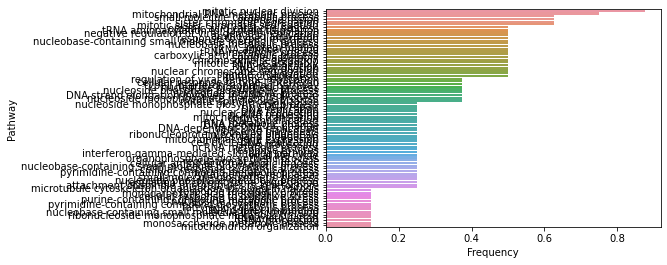

In [35]:
axes = sns.barplot(data = upregulated_pathways_df, y = 'Pathway', x = 'Frequency')


In [36]:
downregulated_pathways = [sig_perm_unranked, sig_perm_slope,sig_perm_downregulated_unranked,sig_perm_downregulated,sig_regression_unranked,sig_regression_slope,
                       sig_regression_downregulated_unranked,sig_regression_downregulated]
downregulated_pathways_df = pd.concat(downregulated_pathways)
num_downregulated_analyses = len(pd.unique(downregulated_pathways_df.Analysis))

In [37]:
downregulated_pathways = []
downregulated_analyses = []
for pathway in pd.unique(downregulated_pathways_df.name):
    pathway_df = downregulated_pathways_df[downregulated_pathways_df.name == pathway]
    analyses = set(pathway_df.Analysis)
    if analyses not in downregulated_analyses:
        downregulated_analyses.append(analyses)
        downregulated_pathways.append({pathway})
    else:
        i = downregulated_analyses.index(analyses)
        downregulated_pathways[i].add(pathway)
downregulated_pathways_df = pd.DataFrame({'Analyses':downregulated_analyses, 'Pathways': downregulated_pathways})
downregulated_pathways_df['Pathway_Frequency'] = [len(a) / num_downregulated_analyses for a in downregulated_pathways_df.Analyses]
downregulated_pathways_df = downregulated_pathways_df.sort_values(by = 'Pathway_Frequency', ascending = False)
downregulated_pathways_df

,Analyses,Pathways,Pathway_Frequency
0,"{perm_unranked, perm_slope, regression_unranked}","{small molecule catabolic process, small molecule metabolic process}",0.500000
4,"{perm_unranked, regression_slope, perm_slope}","{mitotic cell cycle, mitochondrial RNA metabolic process, mitotic cell cycle process, mitotic nuclear division}",0.500000
2,"{perm_unranked, perm_slope}","{organic acid catabolic process, tRNA aminoacylation for protein translation, negative regulation of viral genome replication, amino acid activation, response to type I interferon, nucleobase-containing small molecule metabolic process, nucleobase metabolic process, protein folding, tRNA aminoacylation, tRNA metabolic process, cell cycle process, carboxylic acid catabolic process, organonitrogen compound biosynthetic process, nucleobase biosynthetic process, mitotic cytokinesis, cell cycle}",0.333333
3,"{perm_unranked, regression_unranked}","{response to stress, response to stimulus, regulation of cellular component organization, biological_process}",0.333333
6,"{regression_slope, perm_slope}","{sister chromatid segregation, mitotic spindle organization, spindle assembly, chromosome segregation, mitotic spindle assembly, RNA modification, nuclear division, organelle fission, regulation of attachment of spindle microtubules to kinetochore, mitotic sister chromatid segregation, nuclear chromosome segregation, spindle organization}",0.333333
8,"{perm_downregulated_unranked, regression_unranked}",{cytoskeleton organization},0.333333
1,{perm_unranked},"{organophosphate metabolic process, phosphate-containing compound metabolic process, response to oxidative stress, cellular catabolic process, regulation of molecular function, intracellular signal transduction, cellular response to oxidative stress, monocarboxylic acid metabolic process, organelle organization, cellular response to chemical stress, pyrimidine-containing compound metabolic process, viral genome replication, organic substance metabolic process, nucleotide metabolic process, regulation of hydrolase activity, cellular amino acid metabolic process, viral life cycle, oxoacid metabolic process, macromolecule modification, regulation of catalytic activity, cellular response to stimulus, carboxylic acid metabolic process, organic acid metabolic process, phosphorus metabolic process, small molecule biosynthetic process, nitrogen compound metabolic process, cellular protein metabolic process, regulation of protein modification process, response to virus, regulation of protein metabolic process, interferon-gamma-mediated signaling pathway, nucleobase-containing small molecule biosynthetic process, cellular process, cellular response to DNA damage stimulus, regulation of cellular protein metabolic process, organonitrogen compound metabolic process, organic substance catabolic process, regulation of viral life cycle, regulation of viral genome replication, cellular response to type I interferon, cellular response to stress, type I interferon signaling pathway, primary metabolic process, organophosphate biosynthetic process, regulation of phosphorus metabolic process, positive regulation of catalytic activity, metabolic process, nucleoside phosphate biosynthetic process, catabolic process, cellular metabolic process, nucleotide biosynthetic process, nucleoside phosphate metabolic process}",0.166667
5,{perm_slope},"{pre-replicative complex assembly, DNA metabolic process, mitochondrial translation, double-strand break repair via break-induced replication, ribosome biogenesis, mitochondrial RNA processing, DNA-dependent DNA replication, pre-replicative complex assembly involved in nuclear cell cycle DNA replication, DNA repair, DNA replication, tRNA aminoacylation for mitochondrial protein translation, mitochondrial tRNA processing, ncRNA processing, spindle midzone assembly, chromosome organization, mitotic chromosome condensation, ribonucleoprotein complex biogenesis, nucleoside monophosphate metabolic process, 